In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from psyrun.store import AutodetectStore
store = AutodetectStore()

In [3]:
from cue.analysis.conversion import DataRep
from cue.analysis import evaluation as ev
from cue.analysis.io import read_exp_data
from cue.protocols import PROTOCOLS

In [4]:
from cue.utils.plotting import *

In [5]:
style()

In [9]:
proto = PROTOCOLS['serial']
exp_data = read_exp_data(proto.exp_data)
model_data = DataRep('psyrun', store.load('../data/serial-set/serial3.npz'))

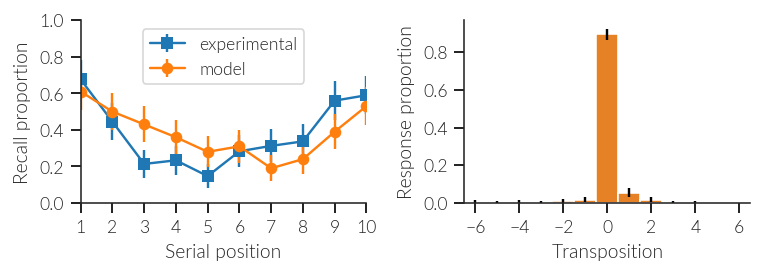

In [10]:
fig = plt.figure(figsize=(textwidth, 0.9 * row_height))
ax = fig.add_subplot(1, 2, 1)
ev.evaluate_serial_pos_curve(proto, exp_data, model_data, ax=ax)
ax.legend(loc='upper center')
ev.evaluate_transpositions(proto, exp_data, model_data, ax=fig.add_subplot(1, 2, 2))
sns.despine(fig)
fig.tight_layout()

In [15]:
data = model_data.data['responses']
data

array([[ 0.,  1.,  2., nan,  4., nan,  6.,  7.,  8.,  9.],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan,  9.],
       [ 0.,  1.,  4.,  3., nan, nan, nan, nan,  8.,  9.],
       [ 0.,  1.,  2., nan, nan,  5., nan,  7.,  8.,  9.],
       [ 0., nan, nan, nan, nan, nan, nan, nan,  8., nan],
       [nan, nan,  1.,  3.,  4.,  5., nan, nan, nan,  9.],
       [ 0.,  1., nan,  3.,  4., nan, nan,  7.,  8., nan],
       [ 0.,  1., nan, nan, nan, nan, nan, nan, nan,  9.],
       [ 0.,  1.,  2., nan, nan, nan, nan,  7.,  8.,  9.],
       [ 0.,  1.,  2., nan, nan, nan, nan, nan, nan, nan],
       [ 0., nan, nan, nan, nan,  5., nan, nan, nan, nan],
       [ 0.,  1.,  2., nan,  4.,  5., nan, nan,  8.,  9.],
       [ 0.,  1.,  2.,  5.,  4., nan, nan, nan, nan,  9.],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan,  9.],
       [ 0.,  1., nan, nan, nan, nan, nan, nan, nan, nan],
       [ 0., nan, nan,  3.,  4., nan, nan, nan, nan, nan],
       [ 0.,  1.,  2.,  3.,  4., nan, nan, nan, nan, nan

In [35]:
n_items = data.shape[1]
trials, pos = np.where(data > np.arange(n_items))

/opt/local/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


In [36]:
trials, pos

(array([ 2, 12, 23, 25, 28, 29, 33, 36, 40, 43, 43, 45, 47, 49, 50, 50, 51,
        51, 55, 62, 62, 63, 63, 63, 66, 72, 84, 90, 98, 99, 99]),
 array([2, 3, 0, 4, 4, 1, 4, 3, 7, 0, 6, 0, 0, 0, 0, 3, 0, 8, 0, 4, 6, 0,
        4, 6, 3, 0, 3, 0, 7, 7, 8]))

In [40]:
infill = 0
fillin = 0
other = 0
for t, p in zip(trials, pos):
    item = data[t, p]
    follow_up = data[t, p + 1]
    if follow_up < item:
        fillin += 1
    elif follow_up > item:
        infill += 1
    else:
        other += 1

In [41]:
print('in-fill:', infill)
print('fill-in:', fillin)
print('other:', other)

in-fill: 1
fill-in: 6
other: 24
